# Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
import io
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download Dataset

* https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set

In [2]:
URL = 'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P'

In [3]:
file_path = tf.keras.utils.get_file('sentiments.csv', URL)
print(file_path)

139264/127831 [================================] - 0s 1us/step
/root/.keras/datasets/sentiments.csv


In [4]:
dataset = pd.read_csv(file_path)
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [5]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

len(sentences), len(labels)

(1992, 1992)

In [6]:
# Split data into training and testing
training_size = int(len(sentences) * 0.8)
print(training_size)

1593


In [7]:
training_sentences = sentences[0 : training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0 : training_size]
testing_labels = labels[training_size:]

len(training_sentences), len(training_labels), len(testing_sentences), len(testing_labels)

(1593, 1593, 399, 399)

In [8]:
# Convert labels into numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [9]:
type(training_labels_final), type(testing_labels_final)

(numpy.ndarray, numpy.ndarray)

In [10]:
len(training_labels_final), len(testing_labels_final)

(1593, 399)

# Tokenize the dataset

In [11]:
VOCAB_SIZE = 500
OOV_TOKEN = '<OOV>'
MAX_LENGTH = 50
PADDING_TYPE = 'post'
TRUNC_TYPE ='post'
EMBEDDING_DIM = 16

In [12]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'i': 4, 'it': 5, 'a': 6, 'is': 7, 'to': 8, 'this': 9, 'was': 10, 'of': 11, 'my': 12, 'for': 13, 'not': 14, 'phone': 15, 'in': 16, 'very': 17, 'with': 18, 'great': 19, 'good': 20, 'on': 21, 'that': 22, 'have': 23, 'you': 24, 'had': 25, 'so': 26, 'but': 27, 'are': 28, 'food': 29, 'service': 30, 'be': 31, 'as': 32, 'place': 33, 'all': 34, 'like': 35, 'quality': 36, 'time': 37, 'product': 38, 'one': 39, 'at': 40, 'we': 41, 'well': 42, 'they': 43, 'would': 44, 'back': 45, 'if': 46, 'headset': 47, 'works': 48, 'battery': 49, 'really': 50, "don't": 51, 'sound': 52, 'your': 53, 'use': 54, 'best': 55, 'up': 56, 'from': 57, 'has': 58, 'just': 59, 'an': 60, "i've": 61, 'will': 62, 'no': 63, 'were': 64, 'only': 65, 'also': 66, 'me': 67, 'there': 68, 'ever': 69, 'than': 70, "it's": 71, 'out': 72, 'nice': 73, 'ear': 74, 'go': 75, 'excellent': 76, 'when': 77, 'first': 78, 'work': 79, 'recommend': 80, '2': 81, 'here': 82, 'after': 83, "i'm": 84, 'or': 85, 'never': 86, 

In [13]:
sequence = tokenizer.texts_to_sequences(training_sentences)
padded_sequence = pad_sequences(sequence, 
                                maxlen=MAX_LENGTH, 
                                padding=PADDING_TYPE, 
                                truncating=TRUNC_TYPE)

In [14]:
print(training_sentences[0])
print(sequence[0])
print(padded_sequence[0])

So there is no way for me to plug it in here in the US unless I go by a converter.
[26, 68, 7, 63, 173, 13, 67, 8, 218, 5, 16, 82, 16, 2, 197, 363, 4, 75, 109, 6, 1]
[ 26  68   7  63 173  13  67   8 218   5  16  82  16   2 197 363   4  75
 109   6   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [15]:
testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_padded_sequence = pad_sequences(testing_sequence,
                                        maxlen=MAX_LENGTH,
                                        padding=PADDING_TYPE,
                                        truncating=TRUNC_TYPE)

# Reverse Word index

In [16]:
reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])
print(reverse_word_index)

{1: '<OOV>', 2: 'the', 3: 'and', 4: 'i', 5: 'it', 6: 'a', 7: 'is', 8: 'to', 9: 'this', 10: 'was', 11: 'of', 12: 'my', 13: 'for', 14: 'not', 15: 'phone', 16: 'in', 17: 'very', 18: 'with', 19: 'great', 20: 'good', 21: 'on', 22: 'that', 23: 'have', 24: 'you', 25: 'had', 26: 'so', 27: 'but', 28: 'are', 29: 'food', 30: 'service', 31: 'be', 32: 'as', 33: 'place', 34: 'all', 35: 'like', 36: 'quality', 37: 'time', 38: 'product', 39: 'one', 40: 'at', 41: 'we', 42: 'well', 43: 'they', 44: 'would', 45: 'back', 46: 'if', 47: 'headset', 48: 'works', 49: 'battery', 50: 'really', 51: "don't", 52: 'sound', 53: 'your', 54: 'use', 55: 'best', 56: 'up', 57: 'from', 58: 'has', 59: 'just', 60: 'an', 61: "i've", 62: 'will', 63: 'no', 64: 'were', 65: 'only', 66: 'also', 67: 'me', 68: 'there', 69: 'ever', 70: 'than', 71: "it's", 72: 'out', 73: 'nice', 74: 'ear', 75: 'go', 76: 'excellent', 77: 'when', 78: 'first', 79: 'work', 80: 'recommend', 81: '2', 82: 'here', 83: 'after', 84: "i'm", 85: 'or', 86: 'never', 

In [17]:
# Decode Reviews
def decode_review(text):
  sent = ' '.join([reverse_word_index.get(i, '?') for i in text])
  return sent

In [18]:
print(decode_review(padded_sequence[0]))
print(training_sentences[0])

so there is no way for me to plug it in here in the us unless i go by a <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
So there is no way for me to plug it in here in the US unless I go by a converter.


# Basic Sentiment Model with Embedding

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE,
                              EMBEDDING_DIM,
                              input_length=MAX_LENGTH),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [20]:
EPOCHS = 10
history = model.fit(x=padded_sequence,
                    y=training_labels_final,
                    epochs=EPOCHS,
                    validation_data=(testing_padded_sequence, testing_labels_final))

Epoch 1/10
50/50 [==============================] - 1s 5ms/step - loss: 0.6919 - accuracy: 0.5198 - val_loss: 0.6970 - val_accuracy: 0.4110
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5223 - val_loss: 0.6988 - val_accuracy: 0.4110
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5292 - val_loss: 0.6984 - val_accuracy: 0.4185
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5505 - val_loss: 0.6958 - val_accuracy: 0.4411
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5819 - val_loss: 0.6855 - val_accuracy: 0.5038
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6290 - val_loss: 0.6727 - val_accuracy: 0.5689
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6911 - val_loss: 0.6599 - val_accuracy: 0.6341
Epoch 8/10
50/50 [==

In [21]:
model_loss_acc = model.evaluate(testing_padded_sequence, testing_labels_final)
print(model_loss_acc)

13/13 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.7043
[0.6106329560279846, 0.7042606472969055]


# Visualize

In [23]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

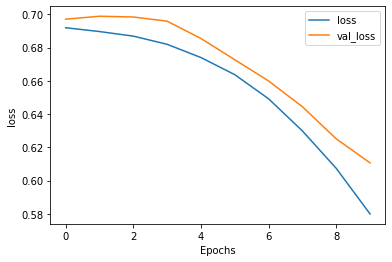

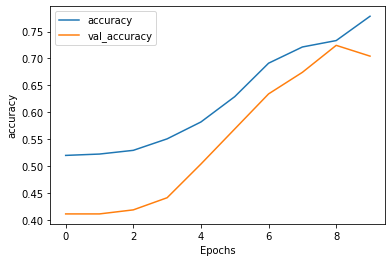

In [24]:
plot_graph(history, 'loss')
plot_graph(history, 'accuracy')

# Get Files to visualize 

In [ ]:
# Get the weights of the embedding layer
layer0 = model.layers[0]
layer0

In [ ]:
layer0_weights = layer0.get_weights()[0]
len(layer0_weights), layer0_weights.shape

(1000, (1000, 16))

In [ ]:
layer0_weights[0]

array([-0.01825841,  0.00744208, -0.02892579, -0.03067325, -0.06528915,
        0.04346679, -0.00487588,  0.08790697, -0.07261115, -0.01252695,
       -0.06112105, -0.05877759, -0.0419664 ,  0.03116908,  0.02797979,
       -0.0800913 ], dtype=float32)

In [ ]:
# Write Embedding Vectors and Metadata

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# for word_num in range(1, VOCAB_SIZE):
#   word = reverse_word_index[word_num]
#   embeddings = layer0_weights[word_num]
#   out_m.write(word + '\n')
#   out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')

# out_v.close()
# out_m.close()

In [ ]:
# # Download the files
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

# Predicting Sentiments

In [25]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']


In [26]:
sample_sequence = tokenizer.texts_to_sequences(fake_reviews)
padded_sample_seq = pad_sequences(sample_sequence,
                                  maxlen=MAX_LENGTH,
                                  padding=PADDING_TYPE)

In [27]:
classes = model.predict(padded_sample_seq)

In [ ]:
classes

array([[0.9788522 ],
       [0.13638458],
       [0.39270744],
       [0.6600948 ],
       [0.4937821 ],
       [0.7333549 ],
       [0.8875664 ],
       [0.04393747],
       [0.90141535],
       [0.02341381]], dtype=float32)

In [28]:
for x in range(len(fake_reviews)):
  print(fake_reviews[x], classes[x])

I love this phone [0.60840565]
I hate spaghetti [0.4855811]
Everything was cold [0.5555109]
Everything was hot exactly as I wanted [0.49785867]
Everything was green [0.5555109]
the host seated us immediately [0.51912814]
they gave us free chocolate cake [0.55957866]
not sure about the wilted flowers on the table [0.4278189]
only works when I stand on tippy toes [0.52073574]
does not work when I stand on my head [0.33701643]
